In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [32]:
olist_orders_df=pd.read_csv('olist_orders_dataset.csv')
olist_orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [33]:
olist_orders_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [34]:
final_df=olist_orders_df.dropna(axis='index',subset=['order_approved_at','order_delivered_carrier_date','order_delivered_customer_date'])

In [35]:
olist_orders_df['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [36]:
final_df['est_delivery_time']=final_df.apply(lambda row:np.abs(pd.to_datetime(row['order_approved_at']).day - pd.to_datetime(row['order_estimated_delivery_date']).day),axis=1)

/home/sutirtha/Documents/Ineuron/internship/ecommerce/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
final_df['actual_delivery_time']=final_df.apply(lambda row:np.abs(pd.to_datetime(row['order_approved_at']).day - pd.to_datetime(row['order_delivered_customer_date']).day),axis=1)

/home/sutirtha/Documents/Ineuron/internship/ecommerce/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [38]:
final_df['is_late'] = final_df['order_delivered_customer_date'] > final_df['order_estimated_delivery_date']

/home/sutirtha/Documents/Ineuron/internship/ecommerce/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
final_df['is_late'].value_counts()

False    88635
True      7826
Name: is_late, dtype: int64

In [40]:
final_df['puchase_week'] = pd.to_datetime(final_df['order_purchase_timestamp']).dt.week

/home/sutirtha/Documents/Ineuron/internship/ecommerce/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.
/home/sutirtha/Documents/Ineuron/internship/ecommerce/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [41]:
final_df['weekly_orders']=final_df['puchase_week'].value_counts()

/home/sutirtha/Documents/Ineuron/internship/ecommerce/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='puchase_week', ylabel='weekly_orders'>

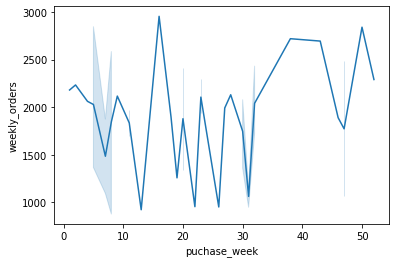

In [44]:
#plt.figure(figsize=(20,10))
sns.lineplot(x='puchase_week',y='weekly_orders',data=final_df)

In [45]:
final_df['delta_days'] = final_df['actual_delivery_time'] - final_df['est_delivery_time']

/home/sutirtha/Documents/Ineuron/internship/ecommerce/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='puchase_week', ylabel='delta_days'>

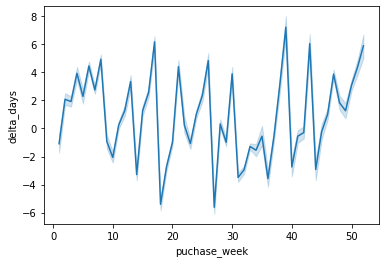

In [46]:
sns.lineplot(x='puchase_week',y='delta_days',data=final_df)

In [48]:
final_df['delta_days'].corr(final_df['weekly_orders'])

0.0780152184391669